In [1]:
import jsq_ps.models as jsq

In [9]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
max_time = 100000
warmup = 3000

In [4]:
times = np.arange(0, 25, 0.001)  # Create a time domain to find the sojourn time cdf over
S1 = jsq.Simulation(
    lambda_=1.5,     # arrival rate of 1.5
    mu=0.7,          # service rate for intended service times
    R=3,             # number of parallel servers
    max_time=max_time,  # simulate until 10000 time units
    warmup=warmup,     # disregard results collected before 500 time units
    times=times,     # the time domain to find the cdf over
    ps_bar=False
)

In [5]:
times = np.arange(0, 25, 0.001)  # Create a time domain to find the sojourn time cdf over
S2 = jsq.Simulation(
    lambda_=1.5,     # arrival rate of 1.5
    mu=0.7,          # service rate for intended service times
    R=4,             # number of parallel servers
    max_time=max_time,  # simulate until 10000 time units
    warmup=warmup,     # disregard results collected before 500 time units
    times=times,     # the time domain to find the cdf over
    ps_bar=False
)

In [6]:
times = np.arange(0, 25, 0.001)  # Create a time domain to find the sojourn time cdf over
S3 = jsq.Simulation(
    lambda_=1.5,     # arrival rate of 1.5
    mu=0.7,          # service rate for intended service times
    R=5,             # number of parallel servers
    max_time=max_time,  # simulate until 10000 time units
    warmup=warmup,     # disregard results collected before 500 time units
    times=times,     # the time domain to find the cdf over
    ps_bar=False
)

In [7]:
import matplotlib.pyplot as plt

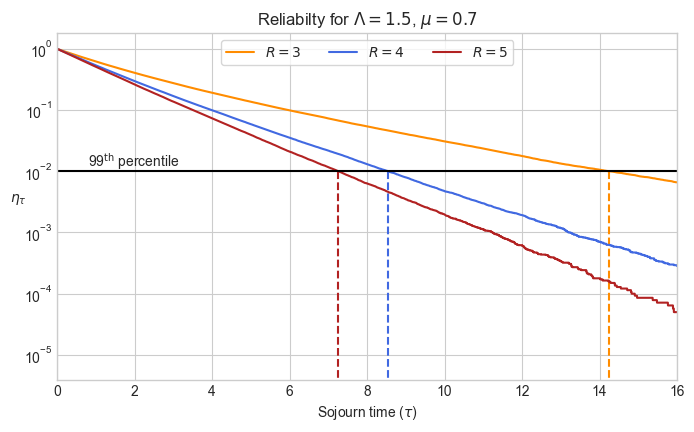

In [76]:
percentile = 99
maxx = 16

plt.figure(figsize=(8, 4.5))
plt.plot(S1.times, 1 - np.array(S1.sojourn_time_cdf), c='darkorange', label=r"$R = 3$")
a = len([p for p in S1.sojourn_time_cdf if p < (percentile / 100)])
t = S1.times[a]
plt.vlines(x=t, ymin=0, ymax=(100 - percentile)/100, color='darkorange', linestyle='dashed')

plt.plot(S2.times, 1 - np.array(S2.sojourn_time_cdf), c='royalblue', label=r"$R = 4$")
a = len([p for p in S2.sojourn_time_cdf if p < (percentile / 100)])
t = S2.times[a]
plt.vlines(x=t, ymin=0, ymax=(100 - percentile)/100, color='royalblue', linestyle='dashed')

plt.plot(S3.times, 1 - np.array(S3.sojourn_time_cdf), c='firebrick', label=r"$R = 5$")
a = len([p for p in S3.sojourn_time_cdf if p < (percentile / 100)])
t = S3.times[a]
plt.vlines(x=t, ymin=0, ymax=(100 - percentile)/100, color='firebrick', linestyle='dashed')

plt.plot([0, maxx], [(100 - percentile) / 100, (100 - percentile) / 100], c='black')
plt.yscale('log')
plt.xlim(0, maxx)
plt.text(maxx * 0.05, 0.012, str(percentile) + r'$^{\text{th}}$ percentile')
plt.xlabel(r"Sojourn time ($\tau$)")
plt.ylabel(r"$\eta_\tau$", rotation=0)
plt.title(r"Reliabilty for $\Lambda = 1.5$, $\mu = 0.7$")
plt.legend(ncols=3, loc=9, frameon=True)
plt.savefig("../../../Desktop/graphical_abstract.pdf")